<a href="https://colab.research.google.com/github/ThanhPhucHuynh/MachineLearningCIT/blob/master/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd


In [68]:
dt = pd.read_csv('./data/data.csv')
dt2 = pd.read_csv('./data/data.csv')

# print(dt)
# print(np.unique(dt.Category))


dt['Category'],Category= pd.factorize(dt['Category'], sort= True)
dt['Sex'],Sex= pd.factorize(dt['Sex'], sort= True)
print(dt.describe())
print(dt.iloc[0:0,2:14])
categorys = np.unique(dt.Category)
data_raw = dt.iloc[:,2:14]






       Unnamed: 0    Category         Age  ...         CREA         GGT        PROT
count  615.000000  615.000000  615.000000  ...   615.000000  615.000000  614.000000
mean   308.000000    0.386992   47.408130  ...    81.287805   39.533171   72.044137
std    177.679487    1.052294   10.055105  ...    49.756166   54.661071    5.402636
min      1.000000    0.000000   19.000000  ...     8.000000    4.500000   44.800000
25%    154.500000    0.000000   39.000000  ...    67.000000   15.700000   69.300000
50%    308.000000    0.000000   47.000000  ...    77.000000   23.300000   72.200000
75%    461.500000    0.000000   54.000000  ...    88.000000   40.200000   75.400000
max    615.000000    4.000000   77.000000  ...  1079.100000  650.900000   90.000000

[8 rows x 14 columns]
Empty DataFrame
Columns: [Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT]
Index: []


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_raw, dt.Category, test_size=0.1, random_state=100)
print(X_train, y_train)
print(X_test, y_test)



     Age  Sex   ALB    ALP   ALT   AST   BIL    CHE  CHOL   CREA    GGT  PROT
538   74    1  20.3   84.0  22.8  43.0   5.7   4.91  3.19   52.0  218.3  47.8
118   43    1  39.7  126.0  21.9  28.9  16.2   8.48  5.30  114.0   21.4  80.3
133   44    1  44.0   84.3  47.4  31.3   4.1  10.28  5.42  105.0   34.2  75.3
117   43    1  37.0   82.0  25.3  26.2   5.4   8.42  4.96   79.0   15.9  68.4
54    37    1  42.9   70.7  16.3  24.1  15.7   9.03  6.80   93.0   70.1  73.4
..   ...  ...   ...    ...   ...   ...   ...    ...   ...    ...    ...   ...
578   38    0  40.0   39.8  14.9  68.9  11.0   8.55  4.31   60.5   40.1  76.5
53    37    1  31.4  106.0  16.6  17.0   2.4   5.95  5.30   68.0   22.9  72.3
350   35    0  46.1   88.7  23.1  20.0   7.7   8.41  4.79   74.0   28.1  79.3
79    38    1  40.5   61.7  18.6  24.7   6.7   8.47  6.05   89.0   19.6  75.6
520   61    0  38.1   66.4  11.8  22.7   6.8   6.35  6.55   65.0   14.5  78.9

[553 rows x 12 columns] 538    1
118    0
133    0
117    0
54 

In [70]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100, max_depth=10,min_samples_leaf=6)

X_test = X_test.fillna(X_test.mean())
X_train = X_train.fillna(X_train.mean())


clf_entropy.fit(X_train,y_train)

y_pred = clf_entropy.predict(X_test)
print(y_pred,y_train)

from sklearn.metrics import confusion_matrix
y_max = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)



[0 0 0 0 0 0 3 0 0 4 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 3 0 0 0 0 0 0] 538    1
118    0
133    0
117    0
54     0
      ..
578    3
53     0
350    0
79     0
520    0
Name: Category, Length: 553, dtype: int64
Accuracy is  88.70967741935483


In [71]:
from sklearn.metrics import classification_report
print ("report:  ", classification_report(y_test,y_pred))

report:                 precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3

    accuracy                           0.89        62
   macro avg       0.33      0.40      0.36        62
weighted avg       0.83      0.89      0.86        62



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
native_test = np.array([32.0,1.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0]).reshape(1, -1)
test_result = clf_entropy.predict(native_test)
print(test_result)
native_test = np.array([40,0,32.0,20.6,5.9,45.3,50.0,5.57,6.30,57.7,100.9,68.5]).reshape(1, -1)
test_result = clf_entropy.predict(native_test)
print(test_result)

[0]
[2]


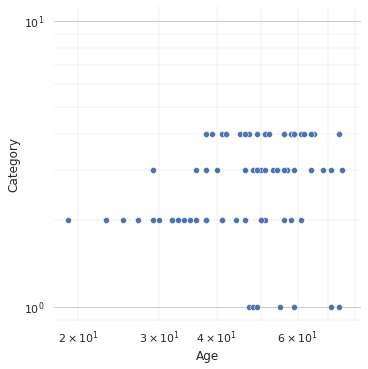

In [73]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=dt,
    x="Age", y="Category",
    # hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)




# # diamonds = sns.load_dataset("diamonds")
# clarity_ranking = dt.iloc[0:0,2:14]
# #["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

# sns.boxenplot(x="Age", y="Category",
#               # color="b", order=clarity_ranking,
#               scale="linear", data=dt)

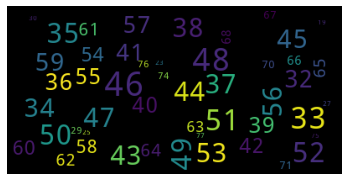

In [74]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# print(dt2['Category'])
# dt2text = " ".join(dt2['Category'])
# dt2text = " ".join(dt2['Age'])
counts = dt2['Age'].value_counts()
counts.index = counts.index.map(str)
# df['id'].astype(str)
# print(dt2text)
wordcloud  = WordCloud(max_words= 200, max_font_size = 40).generate_from_frequencies(counts)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

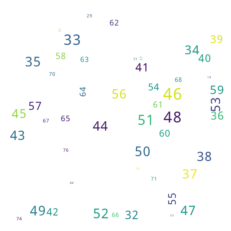

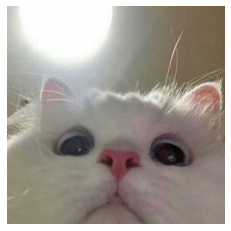

In [75]:
from PIL import Image

mask = np.array(Image.open("./data/images.jpg"))
alice_mask = np.array(Image.open("./data/images.jpg"))
# print(alice_mask)

wordcloud  = WordCloud(max_words= 200, max_font_size = 40,mask = alice_mask,background_color="white").generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
# Naive Bayes algoritması

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf_NB = GaussianNB()
clf_NB = clf_NB.fit(X_train,y_train)

thucte = y_test
dubao = clf_NB.predict(X_test)
from sklearn.metrics import confusion_matrix


cnf_matrix_gnb = confusion_matrix(thucte,dubao)
print('Accuracy = ',metrics.accuracy_score(thucte, dubao))
print('Accuracy VAL: {:.2f}'.format(metrics.accuracy_score(y_test,clf_NB.predict(X_test))))
print("Naive Bayes algoritması:\n",classification_report(thucte,dubao))



Accuracy =  0.8548387096774194
Accuracy VAL: 0.85
Naive Bayes algoritması:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.00      0.00      0.00         1
           2       0.60      0.75      0.67         4
           3       0.50      0.67      0.57         3
           4       0.67      0.67      0.67         3

    accuracy                           0.85        62
   macro avg       0.55      0.60      0.57        62
weighted avg       0.90      0.85      0.88        62

